<a href="https://colab.research.google.com/github/Nickeldon/Frisbee_Model/blob/main/frisbee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini project: Frisbee Trajectory**

Professor Jeremie Choquette

Sunday May 5th 2024

Matthew Kapusta, Mohammad Jibran Budullah , Mohamed Taha Charrat


## **1) Introduction & Problem Definition:**





In this mini project on ODE's and optimization, we will be examining the flight of a frisbee in R^2. This project will include components analogous to the strategies employed in both the optimization and projectile motion projects we have previously completed. Ultimately, we will be including plots of the trajectory of the frisbee and an optimization of said trajectory through an attempt to complete Level 3, a Golden section search in both 1-Dimension and 2-Dimensions.

To begin an overview of the physics portion of the project, generally in an accurately depicted model, a frisbee spinning will possess a large angular momentum. Furthermore, due to the conservation of angular momentum, as the frisbee spins, it will resist any changes in it's orientation, keeping it seemingly stable in space (i.e: it will be oriented in a predictable manner during flight).Conversely,in our Python simulation, we have adopted a simplifying assumption that the frisbee's angle of inclination remains unchanged throughout its trajectory. This assumption represents a notable constraint of our model which will be discussed further in the results and discussion portion of our report as in actuality, the frisbee is subjected to a torque that endeavors to adjust its orientation to be congruent with the direction of its velocity, which could significantly modify its inclination.

In our analysis of the flight of a frisbee through this mini project, the research question we will attempt to answer is:
What is the maximum range as we vary both the inclination of frisbee(beta) and the initial angle of the velocity vector (theta)? Moreover,we will attempt to answer this question through our golden section search in both 1 and 2 dimensions where the theta and beta pertaining to this maximum will be established.

External resources:

WJ Crowther, JR Potts - Sports Engineering, 2007 - Springer

Schroeder, E. J. (2015, April). An aerodynamic simulation of disc flight. csbsju.edu. https://digitalcommons.csbsju.edu/cgi/viewcontent.cgi?article=1067&context=honors_theses



In [ ]:
#Extra: symbollically generating math expressions

import sympy as sp
from IPython.display import display, Math

# Declare variables
rho, r, m, v_0, CD, CL, A, theta, g= sp.symbols('rho r m v_0 CD CL A theta g')

# Define functions for Drag (D) and Lift (L) as functions of theta
D = sp.Function('D')(theta)
L = sp.Function('L')(theta)

# Definitions of D and L based on the angle theta
D = 0.5 * rho * v_0**2 * CD * A  # Drag force
L = 0.5 * rho * v_0**2 * CL * A  # Lift force

# Equations of motion
F_x = -D * sp.cos(theta)  # Drag force component in the x-direction
F_y = L - m * g  # Net force in the y-direction (Lift minus weight)

# Create equations using sympy's Eq object
eq_motion_x = sp.Eq(F_x, m * v_0**2 / (r * sp.cos(theta)))
eq_motion_y = sp.Eq(F_y, m * v_0**2 / (r * sp.sin(theta)))

# Simplify the equations
eq_motion_x_simplified = sp.simplify(eq_motion_x)
eq_motion_y_simplified = sp.simplify(eq_motion_y)

# Display the equations in a clean LaTeX format
print("Equation of motion in x-direction:")
display(Math(sp.latex(eq_motion_x_simplified)))
print("Equation of motion in y-direction:")
display(Math(sp.latex(eq_motion_y_simplified)))








Equation of motion in x-direction:


<IPython.core.display.Math object>

Equation of motion in y-direction:


<IPython.core.display.Math object>

## **2) Model and numerical methods:**

what is needed: Explain your numerical model and how it was implemented.
Explain what you actually did. You don’t need to get into the exact details of your code (ex “used a for loop”), but need to carefully explain how you approached the problem (ex “iterated over angle”).
Your methods should be detailed enough that someone could more or less replicate your work (even if they didn’t have access to your code)
You should also note what constants you used and WHY you used those values (including sources if relevant)
Provide citations for any external sources you use here!


The numerical method employed to find the trajectory of the frisbee was based on Euler’s method. Moreoever, equations of motion were derived using Newton’s second law (symbolically expressed in the intro section), and the trajectory was simulated using Euler’s method. In order to correctly describe the forces of lift and drag, we needed to find their proper coefficients, CL and CD  respectively. To do so, we used the approximated equations by WJ Crowther at Sports Engineering (2007) for each coefficient. As both functions are functions with respect of the angle of attack, this angle (alpha) was defined as the initial launch angle subtracted by the inclination of the frisbee.

Within our code we introduced a new class called “AerodynamicForces” to make it easier to manage the forces acting on the frisbee. After initializing each variable to be used: the initial launch angle (theta), the inclination of the frisbee (beta), the angle of attack (alpha), the drag coefficient (CD), the lift coefficient (CL), the x-velocity (v_x), the y-velocity (v_y), and the net velocity (v), the drag and lift forces were calculated. Both forces were assigned new functions that were then used in the trajectory function.

In order to simulate the trajectory of the frisbee, we needed to employ a multitude of constants. These were the gravitational constant (9.81 m/s^2), the time interval(time step) for each iteration (0.01s), the maximum time of the simulation (5.0s), the air density (1.23kg/m^3), the radius of the frisbee (0.135m), the mass of the frisbee (0.175 kg), the initial x-position (0.0m), the initial y-position (10.0m), and the initial velocity (12.0m/s). Moreover,these constants were used to find the different forces and derive the acceleration formulas of the frisbee in both dimensions: x and y. As previously mentioned, we derived the acceleration formulas with Newton’s second law. The formula for the x-axis was: $1/m*(-Lx – Dx)$;

the formula on the y-axis was:

$1/m*(-mg + Ly - Dy)$.

As the drag and lift forces depend on the angle of attack, we had to update the angle of the velocity(theta) for each new iteration.Hence, theta was calculated using arctan in the function,and,in using the previous formulas that were defined in the class for the drag and lift forces, we were able to calculate each force and code the acceleration formula for each axis.

We then created the trajectory formula. To do this we first stored the initial x-position, the initial y-position, the initial x-velocity, the y-initial velocity, the initial x-acceleration, and the initial y-acceleration into individual lists. Using Euler’s method, we then iterated over the time of simulation using a for loop. In each loop, we updated each position, velocity and acceleration using the following formulas:  

$x_{t+DT} = x(t) + vx(DT)$

$vx_{t+DT} = vx(DT) + ax(DT)$

As the acceleration changes too, it was also updated using its formula and the updated velocities.

Finally, in order to get the accurate range , we looked at when the y-position fall below zero,which is where the for-loop breaks, and the trajectory function returns the last value in the x-position list (this is the range of the frisbee).


The optimization code provided implements the golden section search, a classic optimization algorithm for locating the extremum (minimum or maximum) of a unimodal function, and extends this to a two-dimensional search to optimize the trajectory of a frisbee. The algorithm uses the golden ratio to iteratively reduce the range of values within which the extremum is located.
Initially, the code defines golden_section_search, a function that iteratively adjusts two points, c and d, within the search interval [a, b] based on evaluations of the function f. By comparing the function values at these points and narrowing the interval accordingly, the algorithm refines its search until the width of the interval is less than a specified tolerance, tol. The result returned is the midpoint of the final interval, providing an estimate of the location of the extremum.
Building upon this, the two_dim_gss function conducts a two-dimensional golden section search on two parameters, theta and beta, which affect the frisbee's flight trajectory.

This function optimizes theta and beta iteratively: fixing one while optimizing the other. The objective function within two_dim_gss is designed to return the negative of the frisbee's final horizontal position (x[-1]), effectively making the optimization process seek the maximum range of the throw. This nested approach of using golden section search for each parameter individually allows for an efficient exploration of the two-dimensional parameter space.

For the simulation, specific constants such as the initial position (x_0, y_0), initial velocity (v_0), and the range of possible values for theta and beta are defined. The two_dim_gss function is then called with these parameters to find the optimal theta and beta that maximize the frisbee's range. After optimization, the trajectory of the frisbee is computed using GetFrisbeeTraj with these optimized parameters and plotted to visually represent the result.

Plots were made by using "matplotlib” and using the labels of the axis as the range and the height of the frisbee.

Note: The code for the trajectory and optimization are given below


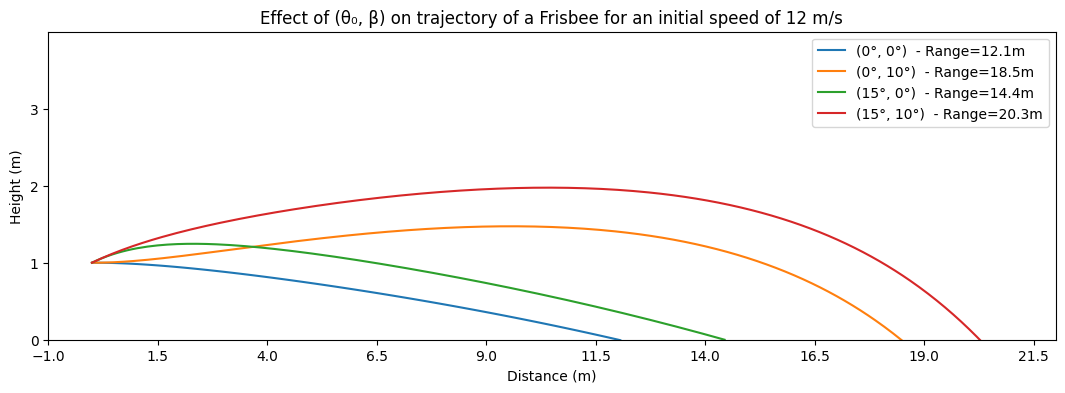

The highest range in the x axis is equal to 20.3m with an angle of 15°


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

"""try:
    import scipy
except ImportError:
    print("Please install SciPy to adjust the scale of the plot.")
"""

def getCD(alpha):
  return 0.085 + 3.30 * (math.radians(alpha) - (-0.052))**2

def getCL(alpha):
  return 0.13 + (3.09 * math.radians(alpha))

class AerodynamicForces:
	def __init__(self, v_x, v_y, theta, beta, rho, A, m):
		self.theta = theta
		self.beta = beta
		self.alpha = self.beta - self.theta*(180/math.pi)
		self.CD = getCD(self.alpha)
		self.CL = getCL(self.alpha)
		self.rho = rho
		self.A = A
		self.m = m
		self.v_x = v_x
		self.v_y = v_y
		self.v = math.sqrt(self.v_x**2 + self.v_y**2)


	def lift(self):
		return {
		'y': 0.5 * self.CL * self.rho * self.A * (self.v)**2,
		'x': 0.5 * self.CL * self.rho * self.A * (self.v)**2}

	def drag(self):
		return {
		'y': 0.5 * self.CD * self.rho * self.A * (self.v)**2,
		'x': 0.5 * self.CD * self.rho * self.A * (self.v)**2}

# Constants
g = 9.81  # Acceleration due to gravity in m/s^2
DT = 0.01   # Time step
T_MAX = 5 # Max time of the simulation
STEPS = int(T_MAX/DT) # Number of steps in the simulation
rho = 1.23            # air density in kg/m^3
r = 0.135
A = math.pi * r**2
m = 0.175          # mass in kg
x_0 = 0               # initial horizontal position in m
y_0 = 1.0             # initial vertical position in m
v_0 = 12.0            # initial speed in m/s


# Create a set of launching angles to try out.
#theta_0 = range(0, 20, 5) # Launch angle in degrees
theta_0 = [0, 0, 15, 15]
beta_0 = [0, 10, 0, 10]

def getAcc(v_x, v_y, m, beta, rho, A):
	theta = math.atan(v_y/v_x)
	#print(theta*180/math.pi)
	AEFORCES = AerodynamicForces(v_x, v_y, theta, beta, rho, A, m)
	Ay = (1 / m) * (-m*g + AEFORCES.lift()['y']*math.cos(theta) - AEFORCES.drag()['y']*math.sin(theta))
	Ax = (1 / m) * (-AEFORCES.lift()['x']*math.sin(theta) - AEFORCES.drag()['x']*math.cos(theta))
	return [Ax,  Ay]


def GetFrisbeeTraj(x_0,y_0,v_0, theta_0, beta, m, A, rho, STEPS):
    vx_0 = v_0 * math.cos(math.radians(theta_0))
    vy_0 = v_0 * math.sin(math.radians(theta_0))

    x = [x_0]
    y = [y_0]
    vx = [vx_0]
    vy = [vy_0]

    acceleration = getAcc(vx[0], vy[0], m, beta, rho, A)

    ax = [acceleration[0]]
    ay = [acceleration[1]]

    for i in range(0, STEPS):
        x.append(x[i] + vx[i] * DT)
        y.append(y[i] + vy[i] * DT)

        vx.append(vx[i] + ax[i]*DT)
        vy.append(vy[i] + ay[i]*DT)

        ax.append(getAcc(vx[-1], vy[-1], m, beta, rho, A)[0])
        ay.append(getAcc(vx[-1], vy[-1], m, beta, rho, A)[1])

        if y[-1] <= 0:
            break

    return x, y

def execute():
  # For loop on the launching angle

  prevHigh = [0, 0]

  # Calculate the trajectory for each launching angle and add to plot
  plt.rcParams['figure.figsize'] = (1	, 4)
  plt.figure(figsize=(13, 4))
  plt.yticks(np.arange(0, 4, 1))
  plt.xticks(np.arange(-1, 22, 2.5))
  plt.xlim(-1, 22)
  plt.ylim(0, 4)

  for index, angle in enumerate(theta_0):
    x,y = GetFrisbeeTraj(x_0,y_0,v_0,angle, beta_0[index], m, A, rho, STEPS)
    if(x[len(x) - 1] > prevHigh[1]):
      prevHigh[0] = angle
      prevHigh[1] = x[len(x) - 1]
    plt.plot(x,y,label = f"({angle}\N{DEGREE SIGN}, {beta_0[index]}\N{DEGREE SIGN})  - Range={x[-1]:.1f}m")
  plt.legend()
  plt.title("Effect of (\u03B8\u2080, \u03B2) on trajectory of a Frisbee for an initial speed of 12 m/s")
  plt.xlabel("Distance (m)")
  plt.ylabel("Height (m)")
  plt.show()
  print(f'The highest range in the x axis is equal to {prevHigh[1]:.1f}m with an angle of {prevHigh[0]}°')

execute()

The result of the one-dimensional golden section search for theta is: Theta = 44.35
The result of the one-dimensional golden section search for beta is: Beta = 10.74
The result of the one-dimensional golden section search for theta is: Theta = 16.20
The result of the one-dimensional golden section search for beta is: Beta = 8.56
The result of the one-dimensional golden section search for theta is: Theta = 16.20
The result of the one-dimensional golden section search for beta is: Beta = 8.56
The result of the one-dimensional golden section search for theta is: Theta = 16.20
The result of the one-dimensional golden section search for beta is: Beta = 8.56


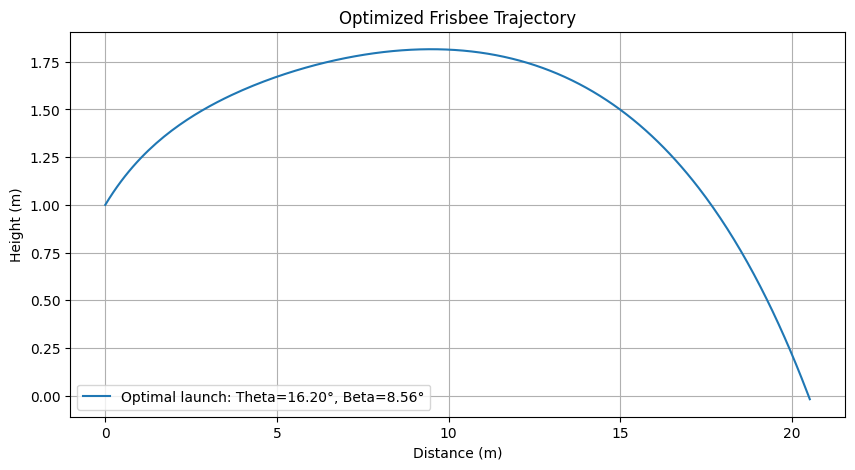

The result of the two-dimensional golden section search is: Theta = 16.20°, Beta = 8.56°
The maximum range with optimized angles is 20.51m.


In [40]:
#optimization code

import numpy as np
import matplotlib.pyplot as plt
import math

# Define a function to perform the golden section search, a method for finding the minimum or maximum of a function
def golden_section_search(f, a, b, tol=1e-5):
    # Define the golden ratio
    phi = (1 + math.sqrt(5)) / 2
    # Calculate c and d based on the golden ratio
    c = b - (b - a) / phi
    d = a + (b - a) / phi
    # Continue adjusting a and b until the desired precision is achieved
    while abs(c - d) > tol:
        # Compare function values at c and d and adjust the search interval
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / phi
        d = a + (b - a) / phi
    # Return the midpoint of the final interval as the best estimate of the extremum
    result = (b + a) / 2
    return result

# Function to perform a two-dimensional golden section search
def two_dim_gss(theta_range, beta_range, tol=1e-5):
    # Define the objective function which returns the negative of the last x position of the frisbee trajectory
    def objective(theta, beta):
        x, y = GetFrisbeeTraj(x_0, y_0, v_0, theta, beta, m, A, rho, STEPS)
        return -x[-1]

    # Initialize the best estimates for theta and beta
    best_theta, best_beta = (theta_range[0] + theta_range[1]) / 2, (beta_range[0] + beta_range[1]) / 2
    for _ in range(100):  # Perform a maximum of 100 iterations
        # Optimize theta by fixing beta
        new_theta = golden_section_search(lambda theta: objective(theta, best_beta), theta_range[0], theta_range[1], tol)
        print(f"The result of the one-dimensional golden section search for theta is: Theta = {new_theta:.2f}")

        # Optimize beta by fixing theta
        new_beta = golden_section_search(lambda beta: objective(new_theta, beta), beta_range[0], beta_range[1], tol)
        print(f"The result of the one-dimensional golden section search for beta is: Beta = {new_beta:.2f}")

        # Break if the changes are below the tolerance
        if abs(new_theta - best_theta) < tol and abs(new_beta - best_beta) < tol:
            break
        best_theta, best_beta = new_theta, new_beta

    return best_theta, best_beta

# Constants for the simulation
x_0 = 0  # Initial horizontal position
y_0 = 1.0  # Initial vertical position
v_0 = 12.0  # Initial velocity
theta_range = (0, 90)  # Range of theta values to explore
beta_range = (0, 90)  # Range of beta values to explore

# Perform the optimization to find the optimal theta and beta (2D)
optimized_theta, optimized_beta = two_dim_gss(theta_range, beta_range)
# Compute the frisbee trajectory using the optimized theta and beta
x, y = GetFrisbeeTraj(x_0, y_0, v_0, optimized_theta, optimized_beta, m, A, rho, STEPS)

# Plot the optimized trajectory
plt.figure(figsize=(10, 5))
plt.plot(x, y, label=f"Optimal launch: Theta={optimized_theta:.2f}°, Beta={optimized_beta:.2f}°")
plt.title("Optimized Frisbee Trajectory")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.legend()
plt.grid(True)
plt.show()

# Print the final result of the two-dimensional search
print(f"The result of the two-dimensional golden section search is: Theta = {optimized_theta:.2f}°, Beta = {optimized_beta:.2f}°")
print(f"The maximum range with optimized angles is {x[-1]:.2f}m.")

## **3)Testing and Validation**:



For the initial coding phase of our project, we relied on the example provided by our instructor to verify the accuracy of our graphs and results. After comparison, it is noticeable that the maximum range of the frisbee in our simulations matched those shown in the instructor's example for corresponding initial theta and beta angle conditions. However, while there are some similarities between the two simulations, it is essential to consider the limitations our model has.

In our implementation, both the inclination and velocity angles of the frisbee remain constant throughout the entire trajectory motion. In real-life conditions, dynamic factors such as air resistance, wind conditions, and rotational forces, because they are constantly changing due to torque forces, the frisbee's flight trajectory is changing differently than the one shown in our model. Incorporating those real-life dynamic factors into our code could show more accurate results. Which most likely is “the largest issue with our model”.

Furthermore, the optimization algorithm used to determine the greatest range of our projectile with variations in both the angle of inclination and initial angle, may show errors in the results (However, it is considered negligible).

To compare our results, we also tried to use the initial conditions of a research paper on the simulation of a Frisbee motion in air.
According to the article on “Aerodynamic Simulation of Disc Flight” by Erynn J. Schroeder, the range of a frisbee trajectory for which the initial conditions for the mass, the radius, the rho, the gravitational acceleration, the angle of attack, the throwing angle, and the velocity are respectively equal to 0.2455 Kg, 0.1365m, 1.2041, 9.81 m/s^2, 11°, 2°, and 22 m/s is equal to 50.0 m (+/- 3m). If those same values are inserted into our Frisbee trajectory simulator (see the code below), the code returns a graph with a range valued at exactly 50.7m with a maximum height of about 5.3m. Which shows that, according to a university research paper, our Frisbee simulator works fully and correctly.




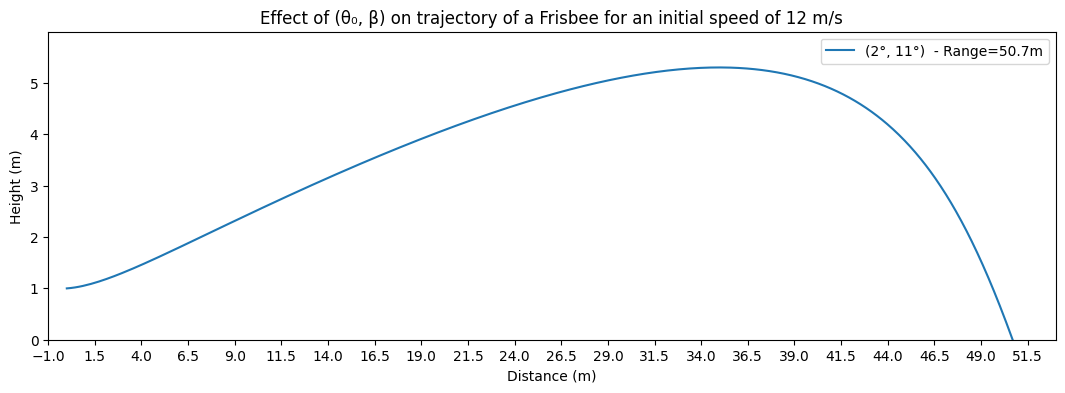

The highest range in the x axis is equal to 50.7m with an angle of 2°


In [ ]:
def run_test():
    #INITIAL CONSTANTS FROM THE RESEARCH PAPER
    # Constants
    g = 9.8  # Acceleration due to gravity in m/s^2
    DT = 0.01   # Time step
    T_MAX = 12.3 # Max time of the simulation
    STEPS = int(T_MAX/DT) # Number of steps in the simulation
    rho = 1.2041            # air density in kg/m^3
    r = 0.27305/2
    A = math.pi * r**2
    m = 0.2455          # mass in kg
    x_0 = 0               # initial horizontal position in m
    y_0 = 1.0             # initial vertical position in m
    v_0 = 22.0            # initial speed in m/s

    #ONLY ONE ANGLE WAS USED
    theta_0 = [2]
    beta_0 = [11]
    # For loop on the launching angle

    #HISTORY ARRAY TO FIND MAXIMUM RANGE
    prevHigh = [0, 0]

    # Calculate the trajectory for each launching angle and add to plot
    plt.rcParams['figure.figsize'] = (1	, 4)
    plt.figure(figsize=(13, 4))
    plt.yticks(np.arange(0, 6, 1))
    plt.xticks(np.arange(-1, 533, 2.5))
    plt.xlim(-1, 53)
    plt.ylim(0, 6)

    for index, angle in enumerate(theta_0):
        x,y = GetFrisbeeTraj(x_0,y_0,v_0,angle, beta_0[index], m, A, rho, STEPS)
    if(x[len(x) - 1] > prevHigh[1]):
        prevHigh[0] = angle
        prevHigh[1] = x[len(x) - 1]
    plt.plot(x,y,label = f"({angle}\N{DEGREE SIGN}, {beta_0[index]}\N{DEGREE SIGN})  - Range={x[-1]:.1f}m")
    plt.legend()
    plt.title("Effect of (\u03B8\u2080, \u03B2) on trajectory of a Frisbee for an initial speed of 12 m/s")
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.show()
    print(f'The highest range in the x axis is equal to {prevHigh[1]:.1f}m with an angle of {prevHigh[0]}°')

run_test()

## **4) Results and discussion:**

Our results are encapsulated in several key graphical representations. The first plot which can be seen in the numerical model and methods visualizes the trajectories of the frisbee under different combinations of initial launch angles (theta) and angles of inclination (beta). These trajectories clearly demonstrate how changes in theta and beta affect the frisbee's path through the air, highlighting the relationship between lift and drag forces acting on the frisbee. Each trajectory plot includes labels indicating the range achieved with specific (theta, beta) pairings, allowing for an immediate visual assessment of the most effective launch configurations for maximizing horizontal distance.Building upon these initial results, we employed a two-dimensional golden section search to identify the optimal values of theta and beta that yield the maximum range.This optimization process was plotted and can be seen in the model and numerical methods section under the optimization code and ultimately displays the optimized frisbee trajectory with the values above. Finally we have included a 3D surface plot, which maps the frisbee's range across a continuum of theta and beta values. The surface plot not only serves as a compelling visual summary of our findings but also marks the optimized parameters and their corresponding maximum range, thereby providing a comprehensive view of the parameter space explored.

Within the graphs explained above,numerous data points are elucidated. Namely, in the optimization graph the data pertaining to our research question is printed (i.e the optimized parameters were found to be theta = 16.20 degrees and beta = 8.56 degrees, with the frisbee achieving a maximum distance of approximately 20.51 meters.)These results not only answer the initial research question about maximizing range through optimal launch parameters but also highlight the critical role of precise parameter control in achieving enhanced aerodynamic performance. This insight could serve as a valuable foundation for further experimental and theoretical studies on projectile motion in sports science.

However,it is crucial to address the limitations and assumptions inherent to our model. Our simulation presumes a constant angle of inclination (beta) throughout the flight, neglecting the real-world effects of aerodynamic torques, which would typically alter the frisbee's orientation dynamically. This simplification could potentially lead to inaccuracies in predicting the true trajectory of a frisbee under normal conditions. Moreover, the model relies on approximate values for the lift and drag coefficients, which are functions of the angle of attack—a parameter derived from the launch angle and frisbee's inclination. The dependency of these coefficients on accurate measurements of the angle of attack underscores another potential source of error.

To improve our model in future studies to better reflect real world scenarios future studies could consider incorporating the changing beta (the angle of inclination) during the flight of a frisbee. Moreover, while the golden section search in two dimensions optimizes beta to provide valuable insights into how its initial value influences the range, the dynamic modeling of beta's changes during flight would add a layer of realism to our experiment.This might involve including calculations for dynamics and torque to represent how a frisbee behaves when subjected to different aerodynamic forces. Additionally, a more detailed experimental validation could be undertaken to calibrate the model against actual frisbee throws, which would help in fine-tuning the lift and drag coefficients and improving the overall accuracy of the trajectory predictions.


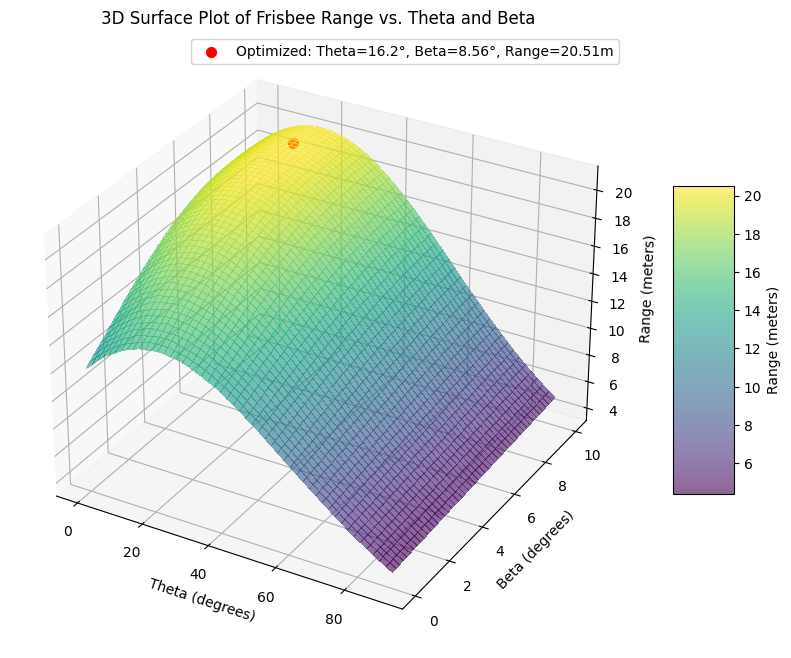

In [ ]:
#Additional 3-D graph

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import math

# Constants
x_0 = 0
y_0 = 1.0
v_0 = 12.0
g = 9.81
rho = 1.23
r = 0.135
A = math.pi * r**2
m = 0.175

# Function to compute the frisbee trajectory and return the range
def GetFrisbeeRange(theta, beta):
    # Assume the trajectory function has been correctly defined here.
    x, y = GetFrisbeeTraj(x_0, y_0, v_0, theta, beta, m, A, rho, STEPS)
    return x[-1]

# Grid of theta and beta values
theta_values = np.linspace(0, 90, 50)  # More points for smoother surface
beta_values = np.linspace(0, 10, 50)
theta, beta = np.meshgrid(theta_values, beta_values)

# Calculate range for each combination of theta and beta
Range = np.array([GetFrisbeeRange(t, b) for t, b in zip(np.ravel(theta), np.ravel(beta))])
Range = Range.reshape(theta.shape)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(theta, beta, Range, cmap=cm.viridis, linewidth=0, antialiased=False, alpha=0.6)

# Highlight the maximum range
optimized_theta = 16.20
optimized_beta = 8.56
max_range = 20.51
ax.scatter([optimized_theta], [optimized_beta], [max_range], color='r', s=50, label=f"Optimized: Theta={optimized_theta}°, Beta={optimized_beta}°, Range={max_range:.2f}m")

# Labels and title
ax.set_xlabel('Theta (degrees)')
ax.set_ylabel('Beta (degrees)')
ax.set_zlabel('Range (meters)')
ax.set_title('3D Surface Plot of Frisbee Range vs. Theta and Beta')
ax.legend()

# Color bar
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.set_label('Range (meters)')

plt.show()

Recopied graphs from the model and numerical methods portion

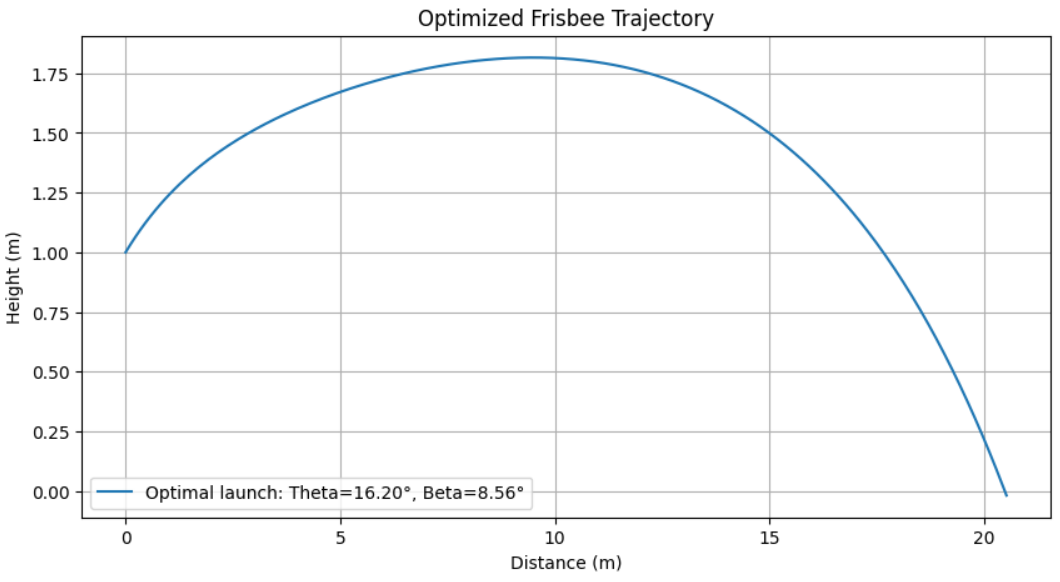

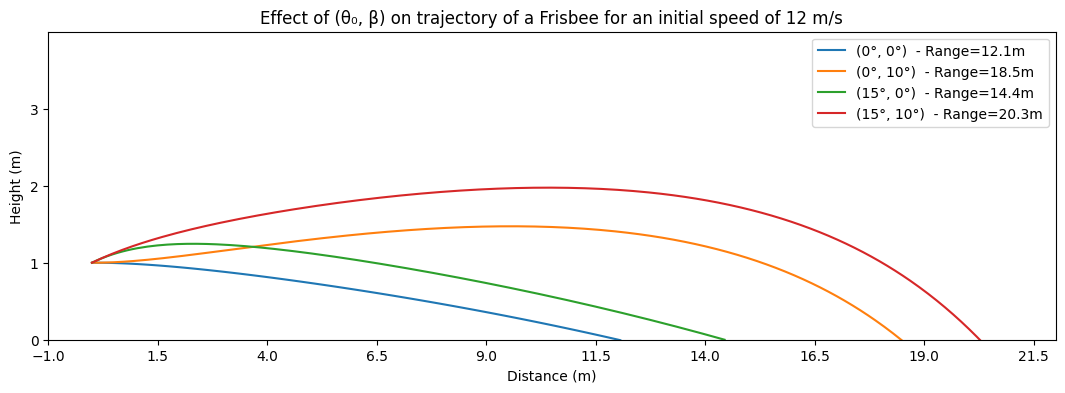

## **5) Conclusion:**

In the mini project at hand, we delved into the dynamics of frisbee flight, exploring how variations in the initial launch angle (theta) and the angle of inclination (beta) influenced the frisbee's trajectory. Utilizing various Python techniques(i.e numerical methods for solving ODEs, complemented by optimization techniques) the objective was to optimize the frisbee’s flight path to maximize its range. This endeavor involved solving ordinary differential equations (ODEs) to simulate the aerodynamics of frisbee flight and applying golden section search techniques in both one and two dimensions to find the optimal settings for theta and beta. Hence, to address the original research question:What is the maximum range as we vary both beta(the inclination of frisbee) and the initial angle of the velocity vector?, it can be concluded that via the implementation of a golden section search in both one and two dimensions, the optimized launch configuration occurred when theta was 16.20° and  beta was 8.56° yielding a maximum distance of approximately 20.51 meters.

This outcome underscores the effectiveness of the golden section search in optimizing complex systems such as frisbee flight, where multiple parameters influence the outcome.However, though it has been repetitive throughout our report, it is important to once again note that our analysis was based on a simplified physics model that considered both lift and drag forces while assuming a constant inclination angle throughout the flight, which arises as a potential source of error in our experiment as this significant simplification would likely not hold in a real-world scenario where aerodynamic torques could alter the frisbee's orientation dynamically. Thus,as discussed in the results and discussion section in more detail, in future studies the viability of our model could be increased by incorporating these dynamics. In sum, this project can be distinguished as a successful experiment as it answered the posed question regarding the frisbee's maximum range based on the parameters theta and beta whilst also highlighting areas for further research and model refinement.

## **Bibliography**

- Schroeder, E. J. (2015, April). An aerodynamic simulation of disc flight. csbsju.edu. https://digitalcommons.csbsju.edu/cgi/viewcontent.cgi?article=1067&context=honors_theses

</br>

- WJ Crowther, JR Potts - Sports Engineering, 2007 - Springer